In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import healpy as hp
from pathlib import Path
import xarray as xr
import easygems.healpix as egh
import pandas as pd

In [12]:
# Define the path to the Zarr dataset
# Open the Zarr store using xarray

zoom_levels = [3,4,5,6,7,8,9,10]
temp_res = 1

# UK MODEL ################################
zoom = 3; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_3 = xr.open_zarr(path)

zoom = 4; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_4 = xr.open_zarr(path)

zoom = 5; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_5 = xr.open_zarr(path)

zoom = 6; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_6 = xr.open_zarr(path)

zoom = 7; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_7 = xr.open_zarr(path)

zoom = 8; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_8 = xr.open_zarr(path)

zoom = 9; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_9 = xr.open_zarr(path)

zoom = 10; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_10 = xr.open_zarr(path)


# GERMAN MODEL ################################


zoom = 10; path = '/g/data/qx55/germany_node/d3hp003.zarr/PT1H_point_z%i_atm.zarr' % zoom
ds_10_g = xr.open_zarr(path)



In [13]:
# Get domain for Sydney

# Read in weather station data
ws = pd.read_excel('hk25-AusNode-ExtremePrecipitation/Syd_station_info.xlsx')

# Create lat / lon arrays
lons = ws['Longitude']
lats = ws['Latitude']
ws_names = ws['Station_name']

# Get boundary of points
margin = 0.1
lon_min = min(lons)-margin
lon_max = max(lons)+margin
lat_min = min(lats)-margin
lat_max = max(lats)+margin
bounds = [lon_min, lon_max, lat_min, lat_max]
print(bounds)
print(ws_names)



# Manually add bounds
lon_min = 149
lon_max = 152
lat_min = -34.8
lat_max = -33

[150.62810000000002, 151.6766, -34.0465, -33.1814]
0           NORAH HEAD AWS
1            RICHMOND RAAF
2       BADGERYS CREEK AWS
3       SYDNEY AIRPORT AMO
4    BANKSTOWN AIRPORT AWS
Name: Station_name, dtype: object


In [14]:
import imageio
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [15]:
# Subset to our time range of interest
start_date = "2020-03-01"
finish_date = "2021-02-28"

In [ ]:
# UK model ##############################
# Get the total annual precipitation spatial map
pr_10 = ds_10.pr * 60*60 # kg m-2 s-1 to mm / hr, not subsetted
time_10_global = pr_10.sel(time=slice(start_date, finish_date))
annual_total = time_10_global.sum(dim='time')


# Define the min and max values for the colorbar
vmin = 0 #625
vmax = 2000 #1700

# Start a new figure with Cartopy projection
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Plot the scatter on top of the basemap
colours = [(1, 1, 1), (0, 0, 1)]  # White to blue
cmap_name = 'white_blue'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colours, N=256)
ax.set_global()
im = egh.healpix_show(annual_total.values, ax=ax, cmap=custom_cmap, vmin=vmin, vmax=vmax)
ax.coastlines()

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Annual Precipitation (mm)")


# Sydney rainfall data
locations = ['norah_head', 'richmond_raaf', 'badgery', 'sydney_airport', 'bankstown_airport']
rainfall = [773.4, 1330.0, 776.4, 905.8, 785.4]



# Plot the points
scatter = ax.scatter(
    lons,
    lats,
    c=rainfall,
    cmap=im.get_cmap(),
    vmin=vmin,
    vmax=vmax,
    s=80,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=10
)

for loc, lon, lat in zip(locations, lons, lats):
    ax.text(lon + 0.1, lat, loc, transform=ccrs.PlateCarree(), fontsize=9, zorder=11)



plt.title("Annual Total Precipitation in Sydney (UK model, z10)")
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Sydney_annual_precip_z10.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()

In [10]:
# German model ##############################
# Get the total annual precipitation spatial map
pr_10 = ds_10_g.pr * 60*60 # kg m-2 s-1 to mm / hr, not subsetted
time_10_global = pr_10.sel(time=slice(start_date, finish_date))
annual_total = time_10_global.sum(dim='time')


# Define the min and max values for the colorbar
vmin = 0 #625 
vmax = 2500 #1700

# Start a new figure with Cartopy projection
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Plot the scatter on top of the basemap
colours = [(1, 1, 1), (0, 0, 1)]  # White to blue
cmap_name = 'white_blue'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colours, N=256)
ax.set_global()
im = egh.healpix_show(annual_total.values, ax=ax, cmap=custom_cmap, vmin=vmin, vmax=vmax)
ax.coastlines()

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Annual Precipitation (mm)")


# Sydney rainfall data
locations = ['norah_head', 'richmond_raaf', 'badgery', 'sydney_airport', 'bankstown_airport']
rainfall = [773.4, 1330.0, 776.4, 905.8, 785.4]



# Plot the points
scatter = ax.scatter(
    lons,
    lats,
    c=rainfall,
    cmap=im.get_cmap(),
    vmin=vmin,
    vmax=vmax,
    s=80,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=10
)

for loc, lon, lat in zip(locations, lons, lats):
    ax.text(lon + 0.1, lat, loc, transform=ccrs.PlateCarree(), fontsize=9, zorder=11)



plt.title("Annual Total Precipitation in Sydney (German model, z10)")
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Sydney_annual_precip_z10_German.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()

NameError: name 'ds_10_g' is not defined

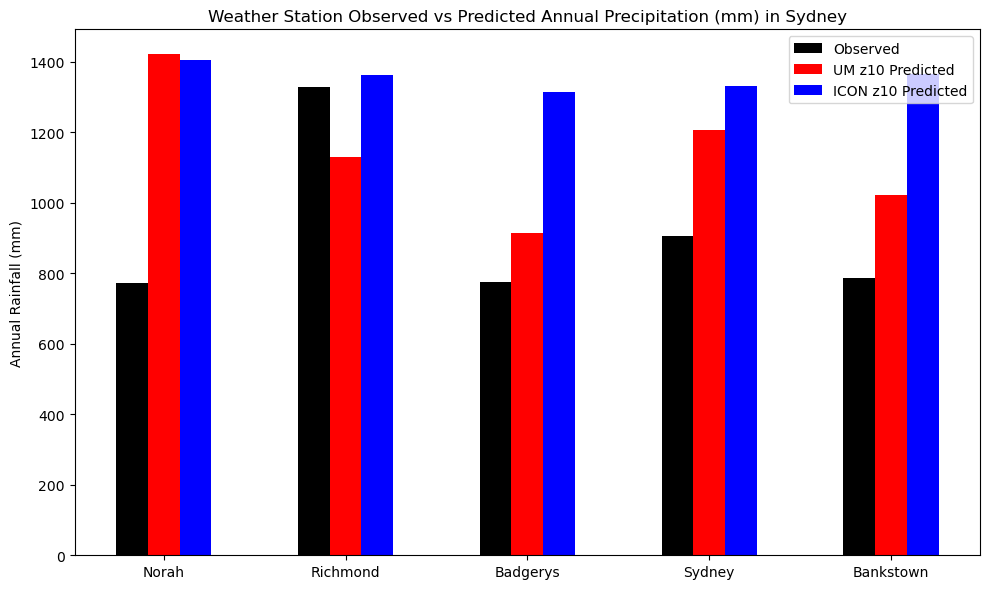

In [16]:
# Plot difference in annual precip

base_obs_path = "~/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney"
base_model_path = "~/hk25-AusNode-ExtremePrecipitation/Data/Model_Daily/Sydney"

locations = ['Norah', 'Richmond', 'Badgerys', 'Sydney', 'Bankstown']
rainfall = [773.4, 1330.0, 776.4, 905.8, 785.4]

# Get model predicted annual precip
predicted_u = []
predicted_g = []
for model_id in locations:
    
    # UK model
    model_file = os.path.expanduser(f"{base_model_path}/u_{model_id}_daily.csv")
    m_data = pd.read_csv(model_file)
    annual_precip = sum(m_data['rain_1h_mm'])
    predicted_u.append(annual_precip)

    # German model
    model_file = os.path.expanduser(f"{base_model_path}/g_{model_id}_daily.csv")
    m_data = pd.read_csv(model_file)
    annual_precip = sum(m_data['rain_1h_mm'])
    predicted_g.append(annual_precip)
    
# Observed data
observed = rainfall

# Bar positions
x = np.arange(len(locations))
width = 0.35  # Width of bars

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, observed, width/2, label='Observed', color='black')
bars2 = ax.bar(x + 0, predicted_u, width/2, label='UM z10 Predicted', color='red')
bars3 = ax.bar(x + width/2, predicted_g, width/2, label='ICON z10 Predicted', color='blue')

# Labeling
ax.set_xlabel('')
ax.set_ylabel('Annual Rainfall (mm)')
ax.set_title('Weather Station Observed vs Predicted Annual Precipitation (mm) in Sydney')
ax.set_xticks(x)
ax.set_xticklabels(locations)
ax.legend()

plt.tight_layout()
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Sydney_annual_precip_barplot.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()
    


2020-03-01
2021-02-28


/jobfs/141006643.gadi-pbs/ipykernel_493340/41864008.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493340/41864008.py:91: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493340/41864008.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493340/41864008.py:91: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493340/41864008.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 

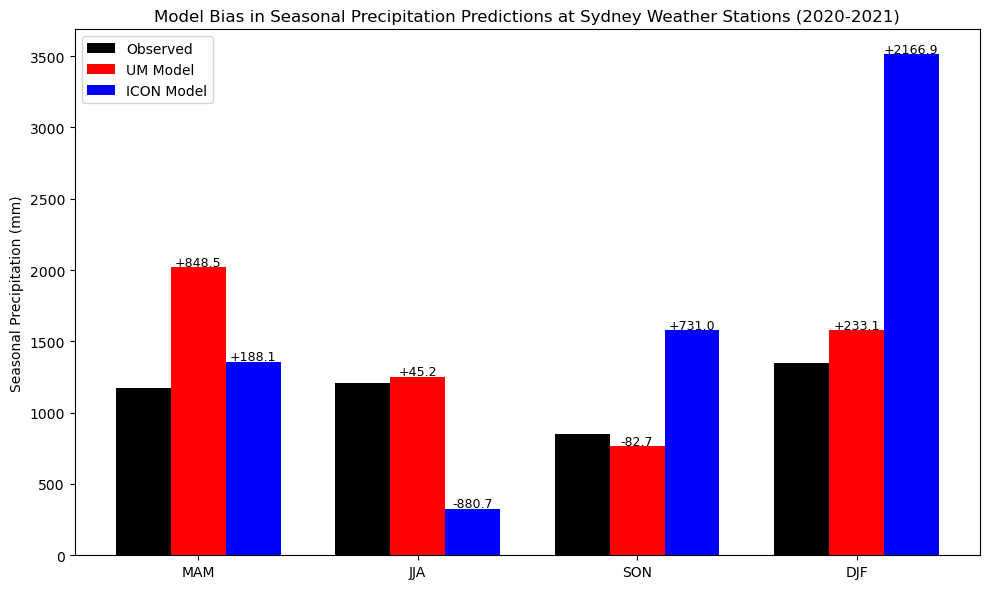

In [23]:
# Show seasonal bias
print(start_date)
print(finish_date)

# Observed seasonal totals
obs = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}

# UM model seasonal totals
um = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}

# ICON model seasonal totals
icon = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}

obs_locations = ['norah', 'richmond', 'badgery', 'sydney', 'bankstown']
for i, obs_id in enumerate(obs_locations):
    # === Load observation ===
    obs_file = os.path.expanduser(f"{base_obs_path}/{obs_id}_daily.csv")
    obs_df = pd.read_csv(obs_file)
    date = pd.to_datetime(obs_df["Time"])
    pr = obs_df["Precipitation"]

    df = pd.DataFrame({
        'date':date,
        'pr':pr
    })
    df = df.set_index('date')
    monthly_sum = df.resample('ME').sum()

    # Get seasonal observation precip
    mam = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ]['pr'].sum()
    jja = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ]['pr'].sum()
    son = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ]['pr'].sum()
    djf = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ]['pr'].sum()
    
    # Get UM seasonal precip
    model_file = os.path.expanduser(f"{base_model_path}/u_{locations[i]}_daily.csv")
    um_df = pd.read_csv(model_file)
    um_df = um_df.set_index('datetime')
    um_df.index = pd.to_datetime(um_df.index)
    monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
    
    mam_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ].sum()
    jja_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ].sum()
    son_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ].sum()
    djf_um = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ].sum()

    # Get ICON seasonal precip
    model_file = os.path.expanduser(f"{base_model_path}/g_{locations[i]}_daily.csv")
    um_df = pd.read_csv(model_file)
    um_df = um_df.set_index('datetime')
    um_df.index = pd.to_datetime(um_df.index)
    monthly_sum = um_df['rain_1h_mm'].resample('M').sum()
    
    mam_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ].sum()
    jja_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ].sum()
    son_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ].sum()
    djf_icon = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ].sum()
    
    # Plotting
    # Observed seasonal totals
    obs_c = {
        'MAM': mam,
        'JJA': jja,
        'SON': son,
        'DJF': djf
    }

    # UM model seasonal totals
    um_c = {
        'MAM': mam_um,
        'JJA': jja_um,
        'SON': son_um,
        'DJF': djf_um
    }

    # ICON model seasonal totals
    icon_c = {
        'MAM': mam_icon,
        'JJA': jja_icon,
        'SON': son_icon,
        'DJF': djf_icon
    }

    obs = {k: obs[k] + obs_c[k] for k in obs}
    um = {k: um[k] + um_c[k] for k in um}
    icon = {k: icon[k] + icon_c[k] for k in icon}


def plot(obs, um, icon):
    seasons = ['MAM', 'JJA', 'SON', 'DJF']
    x = np.arange(len(seasons))
    width = 0.25

    # Bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    bars_obs = ax.bar(x - width, [obs[s] for s in seasons], width, label='Observed', color='black')
    bars_um = ax.bar(x, [um[s] for s in seasons], width, label='UM Model', color='red')
    bars_icon = ax.bar(x + width, [icon[s] for s in seasons], width, label='ICON Model', color='blue')

    # Annotate bias above model bars
    for i, season in enumerate(seasons):
        bias_um = um[season] - obs[season]
        bias_icon = icon[season] - obs[season]
    
        ax.text(x[i], um[season] + 10, f'{bias_um:+.1f}', ha='center', color='black', fontsize=9)
        ax.text(x[i] + width, icon[season] + 10, f'{bias_icon:+.1f}', ha='center', color='black', fontsize=9)

    # Labels and formatting
    ax.set_xticks(x)
    ax.set_xticklabels(seasons)
    ax.set_ylabel('Seasonal Precipitation (mm)')
    ax.set_title(f'Model Bias in Seasonal Precipitation Predictions at Sydney Weather Stations (2020-2021)')
    ax.legend()
    plt.tight_layout()
    fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Sydney_seasonal_precip_barplot.png"
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.show()

plot(obs, um, icon)

In [ ]:
#High precipitation bias in ICON in summer could be 
#-from runanway after the model runs a while,
#-from extracting the model value in the wrong grid